# Initialization

## Load Packages

In [4]:
using HalfIntegers
using LinearAlgebra
using ElasticArrays
using JLD2
using Distributed
using DelimitedFiles
using Random
using CSV
using DataFrames
using LsqFit

## Plot style

In [5]:
using Plots
using Plots.PlotMeasures
using LaTeXStrings

# set backend and style
pgfplotsx()
theme(:default)
default(markerstrokewidth = 0, 
        markerstrokealpha = 0, 
        linewidth = 2, 
        #grid=:none,   
        gridlinewidth= 0.5,
        markersize = 5,
        markershape = :circle,
        tickfontsize = 18, 
        size = (900, 600), 
        legendfontsize = 18, 
        guidefontsize=20,
        titlefontsize = 20,
        legend=(0.03,0.98), 
        xticks = 0:10, 
        foreground_color_axis = "black",
        foreground_color_border = "black",
        foreground_color_guide = "darkorange",
        foreground_color_text = "black",
        guidefontcolor = "black", 
        plot_titlefontcolor = "black",
        titlefontcolor = "black", 
        shape=[:circle])
     

# Computational times

In [3]:
DATA_FOLDER = "../../data"

"../../data"

In [11]:
workers = 32
threads = 1
immirzi = 1

comp_times = Matrix(DataFrame(CSV.File("../../immirzi_$(immirzi)_workers_$(workers)_threads_$(threads).csv", header=true)))

11×4 Matrix{Float64}:
   0.103279    0.116104     0.293382     0.251804
   1.11683     0.604215     1.3912       1.0792
   3.45094     1.87152      6.06216      3.66076
   8.68604     5.40141     20.7738      16.4568
  17.0182     11.9321      60.6532      56.656
  30.9086     23.3513     150.279      159.146
  55.6883     46.0547     329.66       372.945
  92.5456     86.1875     650.399      755.427
 151.321     149.366     1172.8       1370.54
 230.909     231.643     1942.73      2354.07
 353.966     371.643     3151.21      3894.88

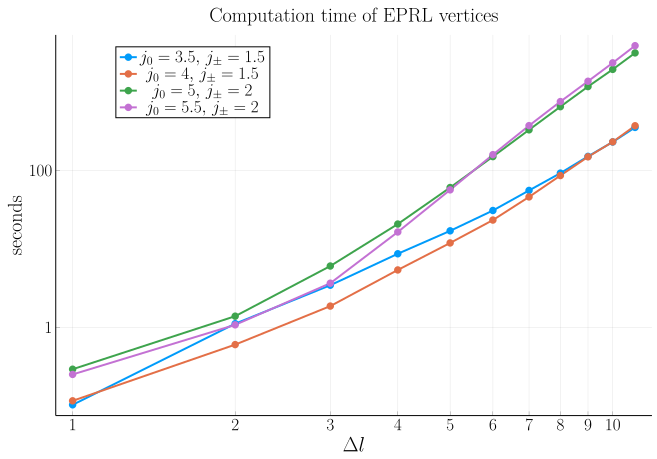

In [16]:
pl1 = plot(1:11, 
    [comp_times[:,1], comp_times[:,2], comp_times[:,3], comp_times[:,4]],
    label=[L"j_0=3.5, \, j_{\pm}=1.5" L"j_0 = 4, \, j_{\pm} = 1.5" L"j_0 = 5, \, j_{\pm} = 2" L"j_0 = 5.5, \, j_{\pm} = 2"],
    markershape = :circle,    
    xticks=0:10,
    yaxis=:log,
    xaxis=:log,
    legend=(0.10,0.97), 
    legendfontsize = 18)
    xlabel!(L"\Delta l")
    ylabel!(L"\textrm{seconds}")
    title!(L"\textrm{Computation time of EPRL vertices}")
#savefig("./plots/laptop_comp_times_workers_$(workers)_threads_$(threads)_immirzi_$(immirzi).pdf")  

# Amplitude

In [17]:
function AmplitudeAbsSquaredLoad(DATA_FOLDER, j0, jpm, K0, Kpm, alpha, T)

    return Matrix(DataFrame(CSV.File("$(DATA_FOLDER)/amplitude_data/j0=$(j0)_jpm=$(jpm)/K0_$(K0)_Kpm_$(Kpm)/immirzi_$(immirzi)/alpha_$(alpha)/amplitude_abs_sq_T_$(T).csv", header=true)))

end

AmplitudeAbsSquaredLoad (generic function with 1 method)

In [7]:
j0 = 1.5
jpm = 0.5
K0 = 0.5
Kpm = 0.5
immirzi = 1
alpha = 3
T = 30

30

In [20]:
ampls = AmplitudeAbsSquaredLoad(DATA_FOLDER, j0, jpm, K0, Kpm, alpha, T)

30×11 Matrix{Float64}:
 1.2744e-26   2.86067e-26  3.68524e-26  …  4.76534e-26  4.7926e-26
 1.25603e-26  2.80959e-26  3.61813e-26     4.68862e-26  4.71516e-26
 1.27422e-26  2.86183e-26  3.69483e-26     4.80224e-26  4.82932e-26
 1.30739e-26  2.96311e-26  3.84649e-26     5.01807e-26  5.04641e-26
 1.34232e-26  3.07602e-26  4.02276e-26     5.26978e-26  5.29965e-26
 1.37806e-26  3.18989e-26  4.20379e-26  …  5.52662e-26  5.55802e-26
 1.42205e-26  3.31308e-26  4.39127e-26     5.78239e-26  5.8151e-26
 1.48004e-26  3.45147e-26  4.5835e-26      6.02586e-26  6.05944e-26
 1.54494e-26  3.58455e-26  4.74773e-26     6.20921e-26  6.24287e-26
 1.59101e-26  3.65338e-26  4.80733e-26     6.23524e-26  6.26769e-26
 1.57821e-26  3.57145e-26  4.65665e-26  …  5.97808e-26  6.00762e-26
 1.46728e-26  3.25858e-26  4.2036e-26      5.33661e-26  5.36137e-26
 1.24004e-26  2.68584e-26  3.42439e-26     4.30046e-26  4.31906e-26
 ⋮                                      ⋱               ⋮
 3.25756e-27  8.47365e-27  1.24898e-2

In [21]:
ampls[:] .= ampls[:] .* 10^(11)

330-element view(::Vector{Float64}, :) with eltype Float64:
 1.274404565623422e-15
 1.256034467164463e-15
 1.2742222606124434e-15
 1.307391527316845e-15
 1.3423193580591028e-15
 1.3780614978198337e-15
 1.4220469451006354e-15
 1.4800368303082721e-15
 1.5449449705185631e-15
 1.591008277575618e-15
 1.5782069293851863e-15
 1.4672831147351215e-15
 1.2400407094550732e-15
 ⋮
 2.049297663593294e-15
 3.780105903917576e-15
 5.64082200969209e-15
 7.234194834296591e-15
 8.261526017035758e-15
 8.596103714027956e-15
 8.295171648159936e-15
 7.555276503720189e-15
 6.634833344083543e-15
 5.774232980635211e-15
 5.138190900925509e-15
 4.792603944263316e-15

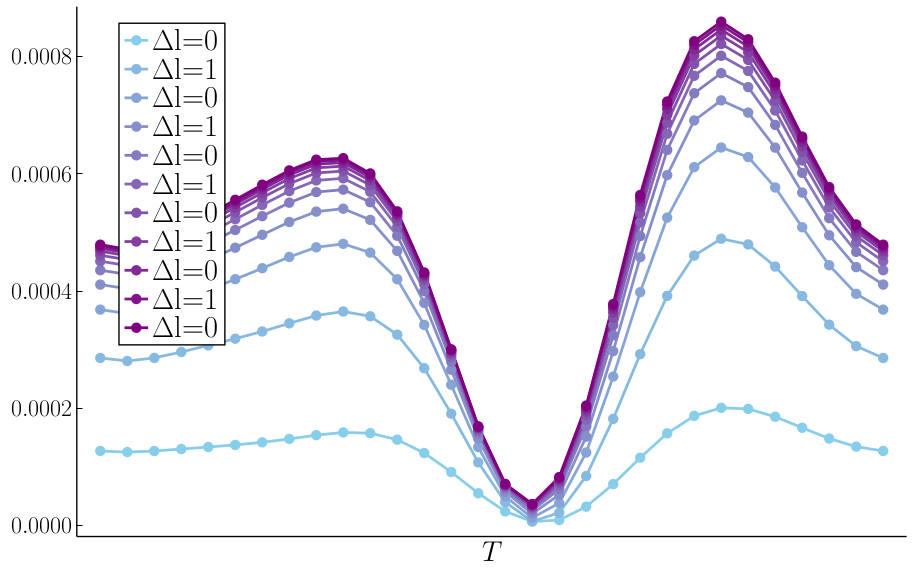

In [31]:
final_x_tick = 100

pl1 = plot(0:29, 
    [ampls[:, 1] ampls[:, 2] ampls[:, 3] ampls[:, 4] ampls[:, 5] ampls[:, 6] ampls[:, 7] ampls[:, 8] ampls[:, 9] ampls[:, 10] ampls[:, 11]],
    label=["Δl=0" "Δl=1"],
    markershape = :circle,    
    grid=:false,
    xticks = (120, round(final_x_tick, digits=3)),
    legend=(0.05,0.97), 
    #palette = palette([:skyblue, :royalblue2, :blue]),
    palette = palette([:skyblue, :purple], 11),
    legendfontsize = 22)
    xlabel!(L"T")
    #title!(L"|W  \, \left(m=1.225, \, \alpha=%immirzi \right) |")
#savefig("(store_folder)/W_alpha_(alpha)_Immirzi_$(immirzi)_m_first.pdf")

In [28]:
ampls = AmplitudeAbsSquaredLoad(DATA_FOLDER, j0, jpm, K0, 0.0, alpha, T)

100×2 Matrix{Float64}:
 1.9967e-41   7.25977e-41
 1.98105e-41  7.19886e-41
 1.93465e-41  7.01836e-41
 1.85919e-41  6.72478e-41
 1.7574e-41   6.32873e-41
 1.63295e-41  5.84452e-41
 1.49033e-41  5.28966e-41
 1.33472e-41  4.68421e-41
 1.17172e-41  4.05003e-41
 1.00723e-41  3.41007e-41
 ⋮            
 1.17172e-41  4.05003e-41
 1.33472e-41  4.68421e-41
 1.49033e-41  5.28966e-41
 1.63295e-41  5.84452e-41
 1.7574e-41   6.32873e-41
 1.85919e-41  6.72478e-41
 1.93465e-41  7.01836e-41
 1.98105e-41  7.19886e-41
 1.9967e-41   7.25977e-41

In [30]:
ampls[:] .= ampls[:] .* 10^20

200-element view(::Vector{Float64}, :) with eltype Float64:
 0.001204311767381451
 0.0011948704345339746
 0.0011668876703598084
 0.0011213748448645883
 0.001059976910144222
 0.0009849129475302605
 0.0008988959642088196
 0.0008050348380722014
 0.0007067219547717615
 0.0006075105980616964
 ⋮
 0.002442782182700372
 0.002825284265136222
 0.003190466070427353
 0.0035251289766586235
 0.0038171773944431476
 0.004056055933037456
 0.004233130899664783
 0.004342002343666899
 0.004378735367395787

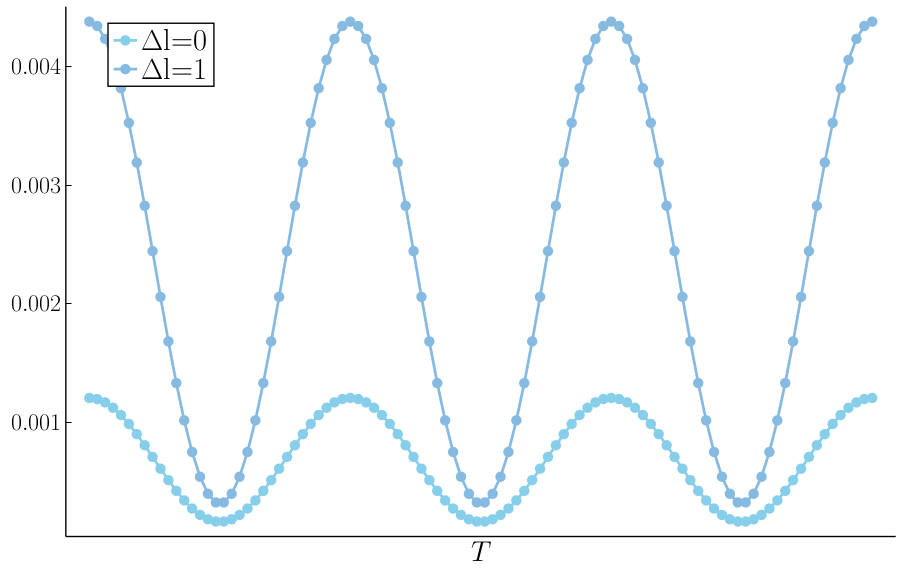

In [31]:
final_x_tick = 100

pl1 = plot(0:99, 
    [ampls[:, 1] ampls[:, 2]],
    label=["Δl=0" "Δl=1"],
    markershape = :circle,    
    grid=:false,
    xticks = (120, round(final_x_tick, digits=3)),
    legend=(0.05,0.97), 
    #palette = palette([:skyblue, :royalblue2, :blue]),
    palette = palette([:skyblue, :purple], 11),
    legendfontsize = 22)
    xlabel!(L"T")
    #title!(L"|W  \, \left(m=1.225, \, \alpha=%immirzi \right) |")
#savefig("(store_folder)/W_alpha_(alpha)_Immirzi_$(immirzi)_m_first.pdf")

In [68]:
using SL2Cfoam

In [69]:
immirzi = 1

conf_sl2cfoam_next = SL2Cfoam.Config(VerbosityOff, HighAccuracy, 100, 0)
SL2Cfoam.cinit("/home/frisus/Scrivania/sl2cfoam-next-dev/data_sl2cfoam", immirzi, conf_sl2cfoam_next)


In [71]:
theta = acos(-sqrt(2 / 3))
phi_1 = 0
phi_2 = 2 * pi / 3
phi_3 = -2 * pi / 3;


In [85]:
c1 = coherentstate_compute([half(2) half(2) half(2) half(2)],
[[phi_1, phi_2, phi_3, 0] [theta, theta, theta, 0]]);

@show c1.a

c1.a = ComplexF64[-0.14583333333333337 - 0.1178511301977578im, -0.12629537138523067 - 0.10206207261596564im, -0.032609324671871935 - 0.026352313834736463im]


3-element Vector{ComplexF64}:
  -0.14583333333333337 - 0.1178511301977578im
  -0.12629537138523067 - 0.10206207261596564im
 -0.032609324671871935 - 0.026352313834736463im

In [86]:
c1 = coherentstate_compute([half(2) half(2) half(2) half(2)],
[[0, phi_1, phi_2, phi_3] [0, theta, theta, theta]]);

@show c1.a

c1.a = ComplexF64[0.0 + 0.0im, 0.0 + 0.0im, -0.19565594803123162 - 0.15811388300841878im]


3-element Vector{ComplexF64}:
                  0.0 + 0.0im
                  0.0 + 0.0im
 -0.19565594803123162 - 0.15811388300841878im

In [81]:
[[theta, theta, theta, 0] [phi_1, phi_2, phi_3, 0]]

4×2 Matrix{Float64}:
 2.52611   0.0
 2.52611   2.0944
 2.52611  -2.0944
 0.0       0.0

# Crossing Time

In [6]:
function LifetimeLoad(DATA_FOLDER, j0, jpm, K0, Kpm, alpha, T)

    return Matrix(DataFrame(CSV.File("$(DATA_FOLDER)/amplitude_data/j0=$(j0)_jpm=$(jpm)/K0_$(K0)_Kpm_$(Kpm)/immirzi_$(immirzi)/alpha_$(alpha)/lifetime_$(T).csv", header=true)))

end

LifetimeLoad (generic function with 1 method)

In [27]:
j0 = 2.0
jpm = 1.0
K0 = 0.5
Kpm = 0.5
immirzi = 1
alpha = 3
T = 30

30

In [28]:
crossing_times = LifetimeLoad(DATA_FOLDER, j0, jpm, K0, Kpm, alpha, T)

1×11 Matrix{Float64}:
 10.0407  10.0854  10.113  10.1315  …  10.1681  10.1729  10.1769  10.1802

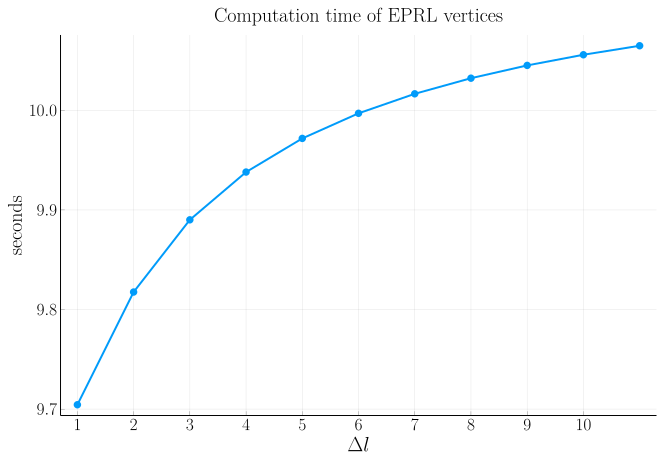

In [ ]:
pl1 = plot(1:11, 
    [crossing_times[1,:]],
    label="",
    markershape = :circle,    
    legend=(0.10,0.97), 
    legendfontsize = 18)
    xlabel!(L"\Delta l")
    ylabel!(L"\textrm{seconds}")
    title!(L"\textrm{Computation time of EPRL vertices}")
#savefig("./plots/laptop_comp_times_workers_$(workers)_threads_$(threads)_immirzi_$(immirzi).pdf")